### Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
%matplotlib inline 
plt.set_loglevel("info")

In [122]:
from pymoo.visualization.scatter import Scatter

In [119]:
# from setupOpt import optStudy
# from pymooCFD.studies.oscillCyl_soo import optStudy
# from pymooCFD.studies.oscillCyl_x2 import optStudy
from pymooCFD.studies.oscillCyl_x2 import optStudy

In [120]:
optStudy.algorithm.history

In [5]:
# optStudy, = np.load('optStudy-oscCylX2-v2/oscCylX2-v2-CP.npy', allow_pickle=True).flatten()

In [7]:
# noOscillCase.plotMeshStudy()

In [8]:
# optStudy.plotDir = os.path.join(optStudy.optDatDir, 'run', 'plots')
# optStudy.saveCP()

In [9]:
# optStudy.testCase.cpPath = os.path.join(optStudy.testCase.caseDir, 'case.npy')
# optStudy.saveCP()

In [10]:
# for case in optStudy.bndCases:
# #     _, tail = os.path.split(case.caseDir)
# #     print(tail)
# #     case.caseDir = os.path.join('optStudy-OscillCylinderOpt/run/boundary-cases', tail)
#     print(case.caseDir)
#     case.msCases = None
# #     case.cpPath = os.path.join(case.caseDir, 'case.npy')
# #     print(case.cpPath)
# optStudy.saveCP()

In [11]:
# meshSFs = np.append(np.around(np.arange(0.3, 1.6, 0.1), decimals=2), [0.25, 0.35, 0.45])
# print(meshSFs)
# for case in optStudy.bndCases:
#     case._meshSFs = meshSFs
# for case in optStudy.gen1Pop:
#     case._meshSFs = meshSFs
# optStudy.testCase._meshSFs = meshSFs
# optStudy.saveCP()

### Check Out Data Generated

In [52]:
datPath = 'optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.0/FORCES_temporal.txt'

# Re = 100
rho = 1
D = 1  # [m] cylinder diameter
U = 1
# kin_visc = U * D / Re
data = np.genfromtxt(datPath, skip_header=1)
# collect data after 100 seconds of simulation time
mask = np.where(data[:, 3] > 100)
# Surface integrals of Cp and Cf
# DRAG: x-direction integrals
F_P1, = data[mask, 4]
F_S1, = data[mask, 6]
F_drag = np.mean(F_P1 - F_S1)
C_drag = F_drag / ((1 / 2) * rho * U**2 * D**2)
# C_Lift
F_P2, = data[mask, 5]
F_S2, = data[mask, 7]
F_lift = np.mean(F_P2 - F_S2)
C_lift = F_lift / ((1 / 2) * rho * U**2 * D**2)

F_L_array = F_P2 - F_S2
C_L_array = F_L_array / ((1 / 2) * rho * U**2 * D**2)

t, = data[mask, 3]

(14168,)
[-0.08996252 -0.0919835  -0.09407115 ...  0.38578349  0.38401229
  0.38215356]


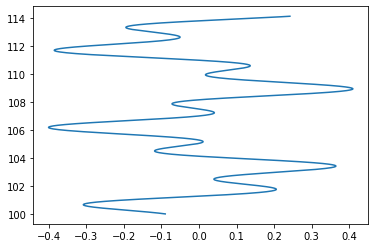

In [59]:
print(t.shape)
print(C_L_array)
# print(F_P2.shape)
# print(F_S2.shape)
# print(F_lift.shape)
# print(C_lift.shape)
clip = 2000
plt.plot(C_L_array[:clip], t[:clip])
plt.show()

In [116]:
datPath = 'optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.0/dump/pt1_U.dat'
# Re = 100
rho = 1
D = 1  # [m] cylinder diameter
U = 1
# kin_visc = U * D / Re
data = np.genfromtxt(datPath, skip_header=1)
# collect data after 100 seconds of simulation time
# print(data[:2, 1])
mask = np.where(data[:, 1] > 100)
t, = data[mask, 1]
u_y, = data[mask, 7]
print(u_y[:10])

[-0.01858136 -0.02966565 -0.04041419 -0.05094826 -0.06159285 -0.07253304
 -0.083153   -0.09382833 -0.10502374 -0.11719687]


In [117]:
dt_array = []
for i in range(len(t)-1):
    dt_array.append(t[i+1]-t[i])
dt = np.mean(dt_array)
print(dt)

0.07058743930147186


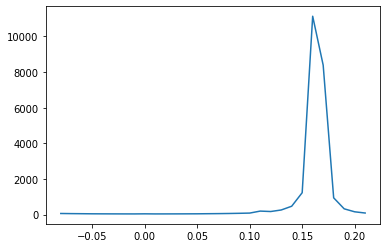

11135.985076931824
-0.15996416564313293


In [118]:
# from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

# data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(u_y))**2

time_step = dt
freqs = np.fft.fftfreq(u_y.size, time_step)
idx = np.argsort(freqs)
freqs = freqs[idx]
ps = ps[idx]
start_i = 700
end_i = 730
plt.plot(freqs[start_i:end_i], ps[start_i:end_i])
plt.show()
print(max(ps))
print(freqs[np.argmax(ps)])

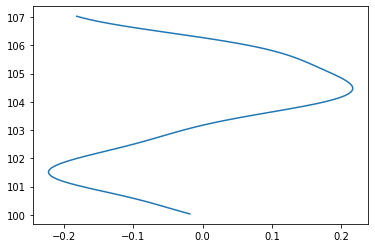

In [72]:
clip = 100
plt.plot(u_y[:clip], t[:clip])
plt.show()

In [108]:
datPath = 'no_osc_case/dump/pt1_U.dat'
# Re = 100
rho = 1
D = 1  # [m] cylinder diameter
U = 1
# kin_visc = U * D / Re
data = np.genfromtxt(datPath, skip_header=1)
# collect data after 100 seconds of simulation time
# print(data[:2, 1])
mask = np.where(data[:, 1] > 100)
t, = data[mask, 1]
u_y, = data[mask, 7]
print(u_y[:10])

[-0.21960236 -0.2110608  -0.20126056 -0.19025012 -0.17808869 -0.16484606
 -0.15060203 -0.13544553 -0.11947342 -0.10278901]


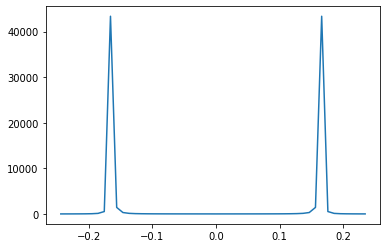

43345.743650412915
-0.16597935846732553


In [114]:
# from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

# data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(u_y))**2

time_step = dt
freqs = np.fft.fftfreq(u_y.size, time_step)
idx = np.argsort(freqs)
freqs = freqs[idx]
ps = ps[idx]
start_i = 700
end_i = 750
plt.plot(freqs[start_i:end_i], ps[start_i:end_i])
plt.show()
print(max(ps))
print(freqs[np.argmax(ps)])

In [26]:
# ind14, = np.load('optStudy-OscCylX3/run/gen1/ind14/case.npy', allow_pickle=True).flatten()

In [27]:
# print(ind14)

In [28]:
# ind14.f

In [29]:
# ind14.postProc()

In [30]:
# def _postProc(self):
#         ####### EXTRACT VAR ########
#         # Extract parameters for each individual
#         A_omega = self.x[0]
#         freq = self.x[1]
#         Re = self.x[2]
#         ######## Compute Objectives ##########
#         ### Objective 1: Drag on Cylinder ###
#         rho = 1
#         D = 1  # [m] cylinder diameter
#         U = 1
#         kin_visc = U * D / Re
#         data = np.genfromtxt(self.datPath, skip_header=1)
#         # collect data after 100 seconds of simulation time
#         mask = np.where(data[:, 3] > 100)
#         # Surface integrals of Cp and Cf
#         # DRAG: x-direction integrals
#         F_P1, = data[mask, 4]
#         F_S1, = data[mask, 6]
#         F_drag = np.mean(F_P1 - F_S1)
#         C_drag = F_drag / ((1 / 2) * rho * U**2 * D**2)
#         C_drag_noOsc = [1.363317903314267276, 1.359490209650251247,
#                         1.398579950573592079, 1.429212801757665297, 1.451893683272913238]
#         Re_i = int(Re / 100) - 1
#         prec_change = (C_drag - C_drag_noOsc[Re_i]) * 100 / C_drag_noOsc[Re_i]

#         ### Objective 2 ###
#         # Objective 2: Power consumed by rotating cylinder
#         res_torque = data[mask, 9]
#         abs_mean_res_torque = np.mean(abs(res_torque))
#         F_res = abs_mean_res_torque * D / 2
#         # F_res = abs_mean_res_torque * D / 2
#         # t = 1  # [sec]
#         # D = 1  # [m] cylinder diameter
#         # th = 0.1  # [m] thickness of cylinder wall
#         # r_o = D / 2  # [m] outer radius
#         # r_i = r_o - th  # [m] inner radius
#         # d = 2700  # [kg/m^3] density of aluminum
#         # L = 1  # [m] length of cylindrical tube
#         # V = L * np.pi * (r_o**2 - r_i**2)  # [m^3] volume of cylinder
#         # m = d * V  # [kg] mass of cylinder
#         # # [kg m^2] moment of inertia of a hollow cylinder
#         # I = 0.5 * m * (r_i**2 + r_o**2)
#         # KE_consu = 0.5 * I * omega**2 * 4 * np.pi * freq * \
#         #     quad(lambda t: abs(np.sin(2 * np.pi * freq * t)
#         #                        * np.cos(2 * np.pi * freq * t)), 0, 1)[0]
#         # A_star = (A_omega*D)/(2*U)
#         # f_star = freq/0.17001699830023273
#         # KE_over_I = (A_star**2/(8*np.pi*f_star))*(2*np.pi*f_star - 0.5*np.sin(4*np.pi*f_star))
#         # print(A_star)
#         # print(f_star)
#         # print(KE_over_I)
#         self.f = [prec_change, F_res]

In [25]:
# import types
# for i in range(50):
#     ind, = np.load(f'optStudy-OscCylX3/run/gen1/ind{i+1}/case.npy', allow_pickle=True).flatten()
#     ind._postProc = types.MethodType(_postProc, ind)
#     ind.postProc()

2022-03-15 11:37:36,587 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind1 :: SKIPPED: POST-PROCESSING
2022-03-15 11:37:36,587 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind1 :: SKIPPED: POST-PROCESSING
2022-03-15 11:37:36,589 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind1 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:36,589 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind1 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:36,591 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind1 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:36,591 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind1 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:36,594 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind1 :: 	Objectives: [2.0204273167760762, 0.05552454411266282]
2022-03-15 11:37:36,594 :

2022-03-15 11:37:36,647 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind8 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:36,649 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind8 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:36,649 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind8 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:36,651 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind8 :: 	Objectives: [40.18159902164143, 0.029175712999951694]
2022-03-15 11:37:36,651 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind8 :: 	Objectives: [40.18159902164143, 0.029175712999951694]
2022-03-15 11:37:36,654 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind9 :: SKIPPED: POST-PROCESSING
2022-03-15 11:37:36,654 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind9 :: SKIPPED: POST-PROCESSING
2022-03-15 11:37:36,656 :: DEBUG    :: pymooCF

2022-03-15 11:37:37,511 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind16 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:37,511 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind16 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:37,513 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind16 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:37,513 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind16 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:37,515 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind16 :: 	Objectives: [-45.9265395914315, 0.07854844032430261]
2022-03-15 11:37:37,515 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind16 :: 	Objectives: [-45.9265395914315, 0.07854844032430261]
2022-03-15 11:37:37,519 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind17 :: SKIPPED: POST-P

2022-03-15 11:37:38,502 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind24 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:38,502 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind24 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:38,504 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind24 :: 	Objectives: [-26.34039960147407, 0.03557219522877588]
2022-03-15 11:37:38,504 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind24 :: 	Objectives: [-26.34039960147407, 0.03557219522877588]
2022-03-15 11:37:38,920 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind25 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:38,920 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind25 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:38,922 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind25 :: 	Objectives: [-14.182325115422332, 0.04038764340019056]
2022-03-15 11:37:38,922 :: INFO     :: pymooCFD.core.cfdCase.op

2022-03-15 11:37:40,410 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind33 :: 	Objectives: [-49.75218539055761, 0.07883427437256676]
2022-03-15 11:37:40,413 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind34 :: SKIPPED: POST-PROCESSING
2022-03-15 11:37:40,413 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind34 :: SKIPPED: POST-PROCESSING
2022-03-15 11:37:40,415 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind34 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:40,415 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind34 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:40,417 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind34 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:40,417 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind34 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:4

2022-03-15 11:37:41,446 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind42 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:41,446 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind42 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:41,447 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind42 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:41,447 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind42 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:41,449 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind42 :: 	Objectives: [-1.337705369574671, 0.006998676358529601]
2022-03-15 11:37:41,449 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind42 :: 	Objectives: [-1.337705369574671, 0.006998676358529601]
2022-03-15 11:37:41,451 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind43 :: SKIPPED: PO

2022-03-15 11:37:41,955 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind50 :: SKIPPED: POST-PROCESSING
2022-03-15 11:37:41,955 :: WARNING  :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind50 :: SKIPPED: POST-PROCESSING
2022-03-15 11:37:41,957 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind50 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:41,957 :: DEBUG    :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind50 :: self.postProc() called but self.f is not None or NaN so no action was taken
2022-03-15 11:37:41,958 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind50 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:41,958 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind50 :: COMPLETE: POST-PROCESS
2022-03-15 11:37:41,960 :: INFO     :: pymooCFD.core.cfdCase.optStudy-OscCylX3/run/gen1/ind50 :: 	Objectives: [0.6113633799594462, 0.09540037999290392]
2022-03-15 11:37:4

In [8]:
pprint(optStudy.__dict__)

{'BaseCase': <class 'pymooCFD.studies.oscillCyl_x3.OscillCylinder'>,
 'CP_path': 'optStudy-OscCylX3/OscCylX3-CP',
 '_runDir': 'optStudy-OscCylX3/run',
 'algorithm': <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7f1965051700>,
 'bndCases': None,
 'cornerCases': None,
 'gen1Pop': None,
 'logger': <RootLogger root (DEBUG)>,
 'n_opt': 20,
 'optDatDir': 'optStudy-OscCylX3',
 'optName': 'OscCylX3',
 'problem': <pymooCFD.studies.oscillCyl_x3.GA_CFD object at 0x7f19650b9eb0>,
 'testCase': <pymooCFD.studies.oscillCyl_x3.OscillCylinder object at 0x7f1965058c40>}


In [9]:
pprint(optStudy.algorithm.__dict__)

{'advance_after_initial_infill': True,
 'callback': <pymooCFD.studies.oscillCyl_x3.MyCallback object at 0x7f19650515b0>,
 'data': {},
 'default_termination': <pymoo.util.termination.default.MultiObjectiveDefaultTermination object at 0x7f1965051520>,
 'display': <pymooCFD.studies.oscillCyl_x3.MyDisplay object at 0x7f19650510a0>,
 'eliminate_duplicates': <pymoo.core.duplicate.NoDuplicateElimination object at 0x7f19650583a0>,
 'evaluator': <pymoo.core.evaluator.Evaluator object at 0x7f19650513a0>,
 'has_terminated': False,
 'history': [],
 'initialization': <pymoo.core.initialization.Initialization object at 0x7f1965058430>,
 'is_initialized': False,
 'mating': <pymoo.core.mating.Mating object at 0x7f19650586d0>,
 'n_gen': 1,
 'n_offsprings': 33,
 'off': Population([<pymoo.core.individual.Individual object at 0x7f1965051940>,
           dtype=object),
 'opt': None,
 'pf': True,
 'pop': Population([<pymoo.core.individual.Individual object at 0x7f1965051940>,
           dtype=object),
 'pop

In [14]:
pprint(optStudy.problem.__dict__)

{'_ideal_point': None,
 '_nadir_point': None,
 '_pareto_front': <pymoo.util.cache.Cache object at 0x7fd5343664c0>,
 '_pareto_set': <pymoo.util.cache.Cache object at 0x7fd1c871b880>,
 'callback': None,
 'check_inconsistencies': True,
 'data': {},
 'exclude_from_serialization': [],
 'n_constr': 0,
 'n_obj': 2,
 'n_var': 2,
 'replace_nan_values_by': inf,
 'xl': array([0.1, 0.1]),
 'xu': array([4., 1.])}


In [15]:
# for key in optStudy.__dict__:
#     pprint("{0:15} : {1}".format(key, optStudy.__dict__[key])) #str(optStudy.__dict__[key]).replace('\n', '\n\t\t  ')))

In [16]:
# for key in optStudy.__dict__:
#     val = str(optStudy.__dict__[key]).replace('\n', '\n\t\t')
#     pprint("{0:15} : {1}".format(key, val))

# Pre-Process Optimization Study

### Test Case

In [17]:
print(optStudy.testCase)
optStudy.testCase

Directory: optStudy-oscCylX2-v2/run/test_case | Parameters: [2.05 0.55]


In [18]:
pprint(optStudy.testCase.__dict__)

{'_f': None,
 '_meshSF': None,
 '_meshSFs': array([1. , 1.3, 1.5, 2. , 3. , 4. , 5. ]),
 '_x': array([2.05, 0.55]),
 'caseDir': 'optStudy-oscCylX2-v2/run/test_case',
 'datFile': 'FORCES_temporal.txt',
 'inputFile': '2D_cylinder.in',
 'jobFile': 'jobslurm.sh',
 'logger': <Logger pymooCFD.core.cfdCase.optStudy-oscCylX2-v2/run/test_case (DEBUG)>,
 'meshFile': '2D_cylinder.msh22',
 'meshSF': 1.0,
 'msCases': [<pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad387d90>,
 'numElem': None,
 'restart': False,
 'solnTime': None}


In [19]:
print(optStudy.testCase.msCases)

[<pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad387d90>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad387ee0>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad38d070>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad38d1c0>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad38d310>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad38d460>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad38d5b0>]


In [20]:
if optStudy.testCase.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    for case in optStudy.testCase.msCases:
        pprint(case.__dict__)
        print()

{'_f': [-2.838674822305784, 0.0897516157000249],
 '_meshSF': None,
 '_meshSFs': None,
 '_x': array([2.05, 0.55]),
 'caseDir': 'optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.0',
 'datFile': 'FORCES_temporal.txt',
 'inputFile': '2D_cylinder.in',
 'jobFile': 'jobslurm.sh',
 'logger': <Logger pymooCFD.core.cfdCase.optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.0 (DEBUG)>,
 'meshFile': '2D_cylinder.msh22',
 'meshSF': 1.0,
 'msCases': None,
 'numElem': 122927,
 'restart': True,
 'solnTime': 2955.143393754959,
 'wallTime': 2950}

{'_f': [-2.944877730649398, 0.08825017591799135],
 '_meshSF': None,
 '_meshSFs': None,
 '_x': array([2.05, 0.55]),
 'caseDir': 'optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.3',
 'datFile': 'FORCES_temporal.txt',
 'inputFile': '2D_cylinder.in',
 'jobFile': 'jobslurm.sh',
 'logger': <Logger pymooCFD.core.cfdCase.optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.3 (DEBUG)>,
 'meshFile': '2D_cylinder.msh22',
 'meshSF': 1.3,
 'msCases': None,
 

In [21]:
print('Mesh Size Factors:', optStudy.testCase.meshSFs)

Mesh Size Factors: [1.  1.3 1.5 2.  3.  4.  5. ]


In [22]:
if optStudy.testCase.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    for case in optStudy.testCase.msCases:
        print(case)
        print('\t Objectives:', case._f)
#     print('\tParameters:', case._x, '\t Objectives:', case._f)

Directory: optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.0 | Parameters: [2.05 0.55] | Objectives: [-2.838674822305784, 0.0897516157000249]
	 Objectives: [-2.838674822305784, 0.0897516157000249]
Directory: optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.3 | Parameters: [2.05 0.55] | Objectives: [-2.944877730649398, 0.08825017591799135]
	 Objectives: [-2.944877730649398, 0.08825017591799135]
Directory: optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-1.5 | Parameters: [2.05 0.55] | Objectives: [-3.2475927036772574, 0.08809875875700958]
	 Objectives: [-3.2475927036772574, 0.08809875875700958]
Directory: optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-2.0 | Parameters: [2.05 0.55] | Objectives: [-3.6570267475450704, 0.08537445818262203]
	 Objectives: [-3.6570267475450704, 0.08537445818262203]
Directory: optStudy-oscCylX2-v2/run/test_case/meshStudy/meshSF-3.0 | Parameters: [2.05 0.55] | Objectives: [-4.60436571202417, 0.07966543560068289]
	 Objectives: [-4.604365712024

##### Update Test Case

In [23]:
# optStudy.appendMeshSFs(optStudy.testCase, [1.2])

In [24]:
# newMeshSFs = np.round(np.arange(0.3, 1.5, 0.1))
# optStudy.saveCP()
# optStudy.testCase.meshSFs

In [25]:
optStudy.testCase.meshSFs

array([1. , 1.3, 1.5, 2. , 3. , 4. , 5. ])

### Corner Case

In [26]:
print(optStudy.cornerCases)

None


In [27]:
# runCCDir = os.path.join(procOptDir, 'runCC')
# ents = os.listdir(runCCDir)
# CCobjs = []
# CCvars = []
# for ent in ents:
#     CCDir = os.path.join(runCCDir, ent)
#     varPath = os.path.join(CCDir, 'var.txt')
#     CCvars.append(np.loadtxt(varPath))
#     objPath = os.path.join(CCDir, 'obj.txt')
#     CCobjs.append(np.loadtxt(objPath))
# CCobjs = np.array(CCobjs)
# CCvars = np.array(CCvars)
# labels = [f'cc-{i}' for i in range(len(CCvars))]

In [28]:
# CCvars = [case.x for case in optStudy.cornerCases]

In [29]:
# plot = Scatter(title= 'Design Space: Corner Cases', legend = True, labels = optStudy.BaseCase.var_labels, grid=True)
# for i, CCvar in enumerate(CCvars):
#     plot.add(CCvar, label=f'cc-{i}')
# plot.show()

In [30]:
# CCobjs = [case.f for case in optStudy.cornerCases]

In [31]:
# plot = Scatter(title= 'Objective Space: Corner Cases', legend = True, labels = optStudy.BaseCase.obj_labels)
# for i, CCobj in enumerate(CCobjs):
#     plot.add(CCobj, label=f'cc-{i}')
# plot.show()

In [32]:
# # Non-dominated Sorting of Corner Cases
# n_survive = 1
# F = CCobjs
# X = CCvars
# from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
# nds = NonDominatedSorting()
# # do the non-dominated sorting until splitting front
# fronts = nds.do(F, n_stop_if_ranked=n_survive)
# front = fronts[0]
# nonDom_CCobj = F[front, :][0]
# nonDom_CCvar = X[front, :][0]
# print('Non-dominated: Corner Cases')
# print('Parameters-', nonDom_CCvar)
# print('Objectives-', nonDom_CCobj)

### Boundary Cases

In [33]:
print(optStudy.bndCases)

[<pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad375640>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad379130>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad379be0>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad37c6d0>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad37e1c0>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad37ec70>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad384760>, <pymooCFD.studies.oscillCyl_x2.OscillCylinder object at 0x7fd1ad387250>]


In [34]:
for case in optStudy.bndCases:
    print(case)

Directory: optStudy-oscCylX2-v2/run/boundary-cases/0.1_0.1 | Parameters: [0.1 0.1] | Objectives: [0.08497899479788673, 0.0018429154135236139]
Directory: optStudy-oscCylX2-v2/run/boundary-cases/0.1_0.55 | Parameters: [0.1  0.55] | Objectives: [0.12257839566260063, 0.004416804037177858]
Directory: optStudy-oscCylX2-v2/run/boundary-cases/0.1_1 | Parameters: [0.1 1. ] | Objectives: [0.1280053520891959, 0.005645827545943745]
Directory: optStudy-oscCylX2-v2/run/boundary-cases/2.05_0.1 | Parameters: [2.05 0.1 ] | Objectives: [17.679480999920894, 0.03381252126560386]
Directory: optStudy-oscCylX2-v2/run/boundary-cases/2.05_1 | Parameters: [2.05 1.  ] | Objectives: [-1.1054666917152982, 0.11514189752227703]
Directory: optStudy-oscCylX2-v2/run/boundary-cases/4_0.1 | Parameters: [4.  0.1] | Objectives: [101.91181697292673, 0.06829537233234428]
Directory: optStudy-oscCylX2-v2/run/boundary-cases/4_0.55 | Parameters: [4.   0.55] | Objectives: [-9.5598841416043, 0.17453613828316375]
Directory: optStud

In [35]:
bndVars = np.array([case.x for case in optStudy.bndCases])
print(bndVars)

[[0.1  0.1 ]
 [0.1  0.55]
 [0.1  1.  ]
 [2.05 0.1 ]
 [2.05 1.  ]
 [4.   0.1 ]
 [4.   0.55]
 [4.   1.  ]]


In [36]:
optStudy.runDir = optStudy._runDir

2022-03-14 15:53:02,848 :: DEBUG    :: root :: runDir setter: head == self.optDatDir


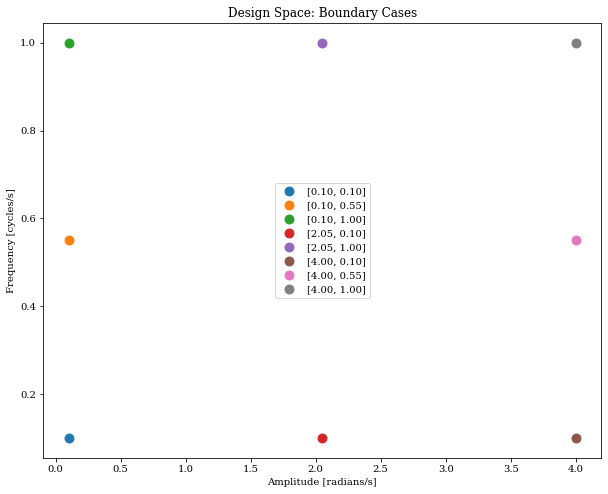

In [37]:
plot = Scatter(title= 'Design Space: Boundary Cases', 
               legend=True,
               labels=optStudy.BaseCase.var_labels, 
               figsize=(10,8)
              )
for var in bndVars:
    plot.add(var, label='[%.2f, %.2f]'%(var[0],var[1]), s=80)
path = os.path.join(optStudy.runDir, 'boundary-cases', 'bndPts_plot-varSpace.png')
plot.save(path, dpi=100)
plot.show()

In [38]:
bndObjs = np.array([case.f for case in optStudy.bndCases])
print(bndObjs)

[[ 8.49789948e-02  1.84291541e-03]
 [ 1.22578396e-01  4.41680404e-03]
 [ 1.28005352e-01  5.64582755e-03]
 [ 1.76794810e+01  3.38125213e-02]
 [-1.10546669e+00  1.15141898e-01]
 [ 1.01911817e+02  6.82953723e-02]
 [-9.55988414e+00  1.74536138e-01]
 [-4.01439410e+00  2.23565175e-01]]


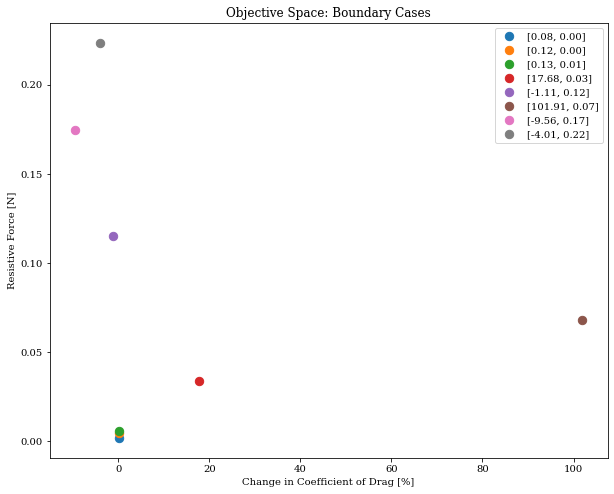

In [39]:
plot = Scatter(title= 'Objective Space: Boundary Cases', 
               legend = True, 
               labels=optStudy.BaseCase.obj_labels, 
               figsize=(10,8)
              )
for obj in bndObjs:
    plot.add(obj, label='[%.2f, %.2f]'%(obj[0],obj[1]), s=70, alpha=1)
path = os.path.join(optStudy.runDir, 'boundary-cases', 'bndPts_plot-objSpace.png')
plot.save(path, dpi=100)
plot.show()

In [40]:
# Non-dominated Sorting of Boundary Cases
n_survive = 1
F = np.array([case.f for case in optStudy.bndCases])
X = np.array([case.x for case in optStudy.bndCases])
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
nds = NonDominatedSorting()
# do the non-dominated sorting until splitting front
fronts = nds.do(F, n_stop_if_ranked=n_survive)
front = fronts[0]
nonDom_CCobj = F[front, :][0]
nonDom_CCvar = X[front, :][0]
print('Non-dominated: Boundary Cases')
print('Parameters-', nonDom_CCvar)
print('Objectives-', nonDom_CCobj)

Non-dominated: Boundary Cases
Parameters- [0.1 0.1]
Objectives- [0.08497899 0.00184292]


In [41]:
# def plotBndPts(pts, title, path):
#     pts = np.array(pts)
#     if pts.shape[1] == 2:
#         fig, ax = plt.subplots(figsize=(7,5))
#         scale = 50
#         for pt in pts:
#             ax.scatter(pt[0], pt[1],
#                        s=scale, 
#                        label='[%.2f,%.2f]'%(pt[0],pt[1]),
#                        )
#         # Shrink current axis by 20%
#         box = ax.get_position()
#         ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#         # Put a legend to the right of the current axis
#         ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#         ax.grid(True)
#         plt.suptitle('Boundary Points')
# #         plt.title('Objective Space')
# #         plt.xlabel(optStudy.BaseCase.obj_labels[0])
# #         plt.ylabel(optStudy.BaseCase.obj_labels[1])
#         plt.savefig(path)
#         print('Figure saved to '+path)
#         plt.show()
#         plt.clf()

In [42]:
# var = [case.x for case in optStudy.bndCases]
# print(var)
# path = os.path.join(optStudy.optDatDir, 'boundary-cases', 'bndPts_plot-varSpace.png')
# plotBndPts(var, 'Design Space', path)

In [43]:
# obj = [case.f for case in optStudy.bndCases]
# print(obj)
# path = os.path.join(optStudy.optDatDir, 'boundary-cases', 'bndPts_plot-objSpace.png')
# plotBndPts(obj, 'Objective Space', path)

### Mesh Studies

In [44]:
# def plotMeshStudy(case):
#     if case.msCases is None:
#         print('NO MESH CASES -', case)
#         return []
#     print('PLOTTING MESH STUDY')
#     print('Mesh Size Factors:', case.meshSFs)
#     print('Mesh Size Factors:', [case.meshSF for case in case.msCases])
#     _, tail = os.path.split(case.caseDir)
#     a_numElem = np.array([c.numElem for c in case.msCases])
#     a_sf = [c.meshSF for c in case.msCases]
#     msObj = np.array([c.f for c in case.msCases])
#     msTimes = np.array([c.solnTime for c in case.msCases])
#     print(msTimes)
#     # Plot
#     plots = []
    
#     ### number of elements vs time
#     plot = Scatter(title='Mesh Study: '+tail, legend=True, grid=True, 
#                    labels = ['Number of Elements', 'Solution Time [s]'],
#                    tight_layout=True
#                   )
#     for i in range(len(a_numElem)):
#         pt = np.array([a_numElem[i], msTimes[i]])
#         plot.add(pt, label=a_sf[i], marker='o', linestyle="-")
#     plot.do()
#     plot.ax.get_legend().set_title('Mesh Size Factors')
#     fName = f'ms_plot-{tail}-numElem_v_time.png'
#     fPath = os.path.join(case.meshStudyDir, fName)
#     plot.save(fPath, dpi=100)
#     print('Plot Saved To '+fPath)
#     plots.append(plot)
#     for obj_i, obj_label in enumerate(case.obj_labels):
# #         fig, ax = plt.subplots(figsize=(10,5))
# #         ax.plot(a_numElem, msObj[:,obj_i])
# #         for i in range(len(a_numElem)):
# #             x = a_numElem[i]
# #             y = msObj[i, obj_i]
# #             ax.plot(x, y, 
# #                     marker='o',
# #                     label=a_sf[i],
# #                    )
# #         # Shrink current axis by 20%
# #         box = ax.get_position()
# #         ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# #         # Put a legend to the right of the current axis
# #         ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# #         ax.grid(True)
# #         plt.title('Mesh Study: '+tail)
# #         plt.xlabel('Number of Elements')
# #         plt.ylabel(obj_label)
# #         fName = f'ms_plot-{tail}-obj{obj_i}.png'
# #         fPath = os.path.join(case.meshStudyDir, fName)
# #         fig.savefig(fPath)
# #         plots.append(plt)
#         ### Number of elements vs Objective
#         plot = Scatter(title='Mesh Study: '+tail, legend=True, grid=True, 
#                        labels = ['Number of Elements', obj_label],
#                        tight_layout=True
#                       )
#         for i in range(len(a_numElem)):
#             pt = np.array([a_numElem[i], msObj[i, obj_i]])
#             plot.add(pt, label=a_sf[i], marker='o', linestyle="-")
#         plot.do()
#         plot.ax.get_legend().set_title('Mesh Size Factors')
#         fName = f'ms_plot-{tail}-numElem_v_obj{obj_i}.png'
#         fPath = os.path.join(case.meshStudyDir, fName)
#         plot.save(fPath, dpi=100)
#         print('Plot Saved To '+fPath)
#         plots.append(plot)
        
#         ### Time vs Objective
#         plot = Scatter(title='Mesh Study: '+tail, legend=True, grid=True, 
#                        labels = ['Solution Time [s]', obj_label],
#                        tight_layout=True
#                       )
#         for i in range(len(a_numElem)):
#             pt = np.array([msTimes[i], msObj[i, obj_i]])
#             plot.add(pt, label=a_sf[i], marker='o', linestyle="-")
#         plot.do()
#         plot.ax.get_legend().set_title('Mesh Size Factors')
#         fName = f'ms_plot-{tail}-solnTime_v_obj{obj_i}.png'
#         fPath = os.path.join(case.meshStudyDir, fName)
#         plot.save(fPath, dpi=100)
#         print('Plot Saved To '+fPath)
#         plots.append(plot)
        
#         ### Number of Elements vs Objective vs time
#         plot = Scatter(title='Mesh Study: '+tail, legend=True, grid=True, 
#                        labels = ['Number of Elements', obj_label, 'Solution Time [s]'],
#                        tight_layout=True, bbox_to_anchor = (1.05, 1.0)
#                       )
#         for i in range(len(a_numElem)):
#             pt = np.array([a_numElem[i], msObj[i, obj_i], msTimes[i]])
#             plot.add(pt, label=a_sf[i], marker='o', linestyle="-")
#         plot.do()
#         plot.ax.get_legend().set_title('Mesh Size Factors')
#         plot.ax.legend(title='Mesh Size Facotr', bbox_to_anchor=(1.01, 1.0))
#         fName = f'ms_plot-{tail}-numElem_v_obj{obj_i}_v_time.png'
#         fPath = os.path.join(case.meshStudyDir, fName)
#         plot.save(fPath, dpi=100)
#         print('Plot Saved To '+fPath)
#         plots.append(plot)
#     return plots

In [45]:
# case = optStudy.testCase
# case = optStudy.bndCases[1]
# case = optStudy.BaseCase('no_osc_case', [0, 0])
# from pymooCFD.studies.oscillCyl_x3 import optStudy
# case = optStudy.BaseCase('no_osc_x3_Re500_case', [0, 0, 5])

In [46]:
# print('CASE:', case)
# plots = plotMeshStudy(case)
# for plot in plots:
#     plot.show()

In [47]:
# print(optStudy.bndCases)
# for case in optStudy.bndCases:
#     print('CASE:', case)
#     plots = plotMeshStudy(case)
#     for plot in plots:
#         plot.show()

### Generation 1

In [48]:
print(optStudy.algorithm.history)

[<pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1b5874130>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1b588c8b0>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad61f550>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad63f340>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad5d5910>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad5f4580>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad60ac10>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad5c0f10>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad58fa60>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad4dc190>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad4cbdf0>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad39a9d0>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad3b5bb0>]


In [49]:
print(optStudy.algorithm.history[0].pop)

##### Generation 1: Parameter Space

In [51]:
# optStudy.plotDir = os.path.join(optStudy.optDatDir, 'plots')
# os.mkdir(optStudy.plotDir)

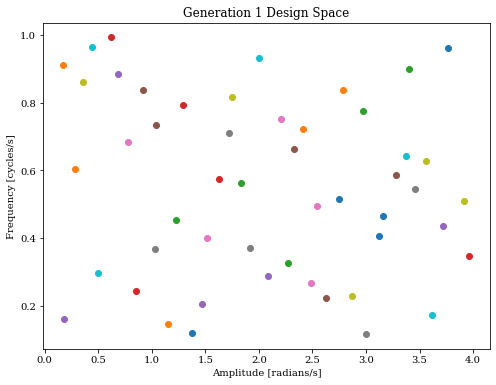

In [89]:
popX = optStudy.algorithm.history[0].pop.get('X')
gen = optStudy.algorithm.history[0].n_gen
if len(popX) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Design Space', 
               legend=leg, 
               labels=optStudy.BaseCase.var_labels,
#                figsize=(10,8)
              )
for ind_i, ind in enumerate(popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(os.path.join(optStudy.plotDir, 'gen1_var_space.png'), dpi=100)
plot.show()

##### Generation 1: Objective Space

optStudy-oscCylX2-v2/run/plots/gen1_obj_space.png


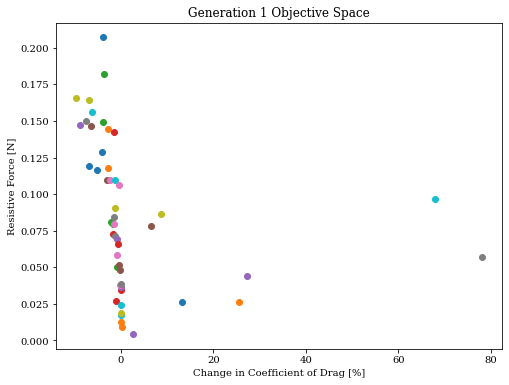

In [88]:
popF = optStudy.algorithm.history[0].pop.get('F')
gen = optStudy.algorithm.history[0].n_gen
if len(popF) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Objective Space', 
               legend=leg, 
               labels=optStudy.BaseCase.obj_labels
              )
for ind_i, ind in enumerate(popF):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(os.path.join(optStudy.plotDir, 'gen1_obj_space.png'), dpi=100)
print(os.path.join(optStudy.plotDir, 'gen1_obj_space.png'))
plot.show()

####

##### Generation 1: Examine Parameter to Objective Space Mapping
Plot every parameter and objective against each other 

In [54]:
print(optStudy.algorithm.history)

[<pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1b5874130>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1b588c8b0>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad61f550>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad63f340>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad5d5910>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad5f4580>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad60ac10>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad5c0f10>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad58fa60>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad4dc190>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad4cbdf0>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad39a9d0>, <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7fd1ad3b5bb0>]


In [55]:
optStudy.mapDir = os.path.join(optStudy.optDatDir, 'mapGen1')
print(optStudy.mapDir)
os.makedirs(optStudy.mapDir, exist_ok=True)
# optStudy.mapDir = 'optStudy-OscillCylinderOpt/run/mapGen1'
# optStudy.saveCP()


AttributeError: can't set attribute

In [56]:
%%capture
# ^ suppresses output
from scipy.stats import linregress
##### Variable vs. Objective Plots ######
# extract objectives and variables columns and plot them against each other
var_labels = optStudy.BaseCase.var_labels
obj_labels = optStudy.BaseCase.obj_labels
popX = optStudy.algorithm.history[0].pop.get('X').astype(float)
popF = optStudy.algorithm.history[0].pop.get('F').astype(float)
mapPaths = []
# plots = []
fig = plt.figure(figsize=(10,8))
for x_i, x in enumerate(popX.transpose()):
    for f_i, f in enumerate(popF.transpose()):
        plot = Scatter(title=f'{var_labels[x_i]} vs. {obj_labels[f_i]}',
                       labels=[var_labels[x_i], obj_labels[f_i]], 
#                        figsize=(10,8)
#                        legend = True,
                      )
        xf = np.column_stack((x,f))
        plot.add(xf)
        
        ### Linear best fit line 
#         m, b, r_value, p_value, std_err = linregress(x, f)
#         r_squared = r_value**2
#         xy = np.column_stack((x, m*x+b))
#         plot.n_dim = 2
#         plot._do()
#         plot.plot(plot.ax, 'line', xy, label='Best Linear Fit', c='r')
#         plot.ax.text(min(xf[:,0]), max(xf[:,1]), 'Best Linear Fit', 
#                      horizontalalignment='left',
#                      c = 'r',
#                      size = 16
#                     )
#         plot.ax.text(max(xf[:,0]), max(xf[:,1]), r'$r^2$={0:.4f}'.format(r_squared), 
#                      horizontalalignment='right',
#                      c = 'r',
#                      size = 16
#                     )

        ### Polynomial best fit lines
        plot.do()
        plot.legend = True
        c = ['r', 'g', 'm']
        for d in range(1, 3+1):
            coefs = np.polyfit(x, f, d)
            y = np.polyval(coefs, x)
            xy = np.column_stack((x, y))
            xy = xy[xy[:, 0].argsort()]
#             correlation = np.corrcoef(x, y)[0, 1]
#             r_squared = correlation**2
#             if d == 1:
#                 label = 'Order %i Best Fit, $r^2$=%.2g' %(d, r_squared)
#             else:
#                 label = f'Order {d} Best Fit'
            label = f'Order {d} Best Fit'
#             plot.add(xy, label=f'Order {d} Best Fit', marker='x')
            plot.ax.plot(xy[:,0], xy[:,1], label=label, c=c[d-1])
        plot.do()
        var_str = var_labels[x_i].replace(" ", "_").replace("/", "|").replace('%', 'precentage').replace("\\", "|")
        obj_str = obj_labels[f_i].replace(" ", "_").replace("/", "|").replace('%', 'precentage').replace("\\", "|")
        fName = f'{var_str}-vs-{obj_str}.png'
        path = os.path.join(optStudy.mapDir, fName)
        mapPaths.append(path)
#         plots.append(plot)
        plot.save(path, dpi=100)
#         plot.show()
#         ax = fig.add_subplot(111).add_axes(plot.ax)
#         ax = plot.ax
# fig.show()
# fig, axes = plt.subplots(2,2)
# print(fig)
# for row in axes:
#     for ax in row:
#         print(ax)
#         ax = plots[0].ax
#         print(ax)
# for row in axes:
#     for ax in row:
# #         ax = plots[0]
#         print(ax)
# print(plots[0].ax)
# fig = plt.figure()
# for i, plot in enumerate(plots):
#     ax = fig.add_subplot(int(f'{i+1}11'))
#     ax.text(1,1,i)
    
    

# len_ax = round(len(plots)/2)
# fig, ax = plt.subplots(len_ax,len_ax)
# c = 0
# for i in range(len_ax):
#     for j in range(len_ax):
#         if c <= len(plots):    
#             print(plots[c])
#             ax[i][j] = plots[c].ax
#             c += 1

#### Generation 1: Display Mapping
Remember that for each plot the parameters(s) not labeled are also varying. 

Therefore, if a strong relationship is seen in these plots then it is likely a relationship independent of the other variable.


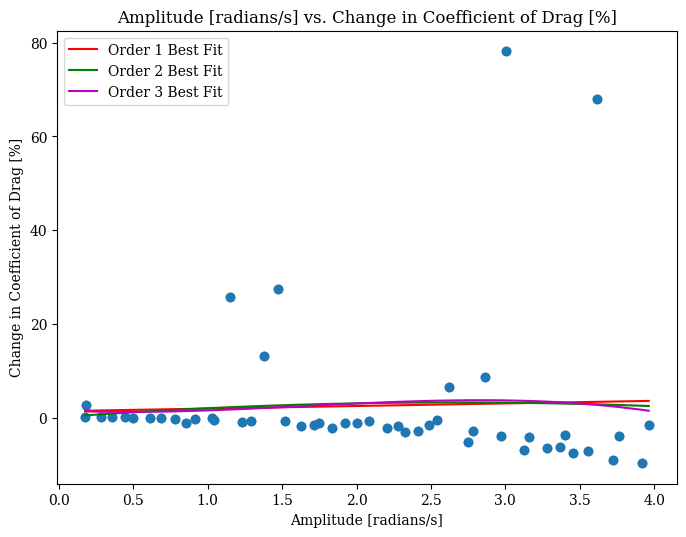

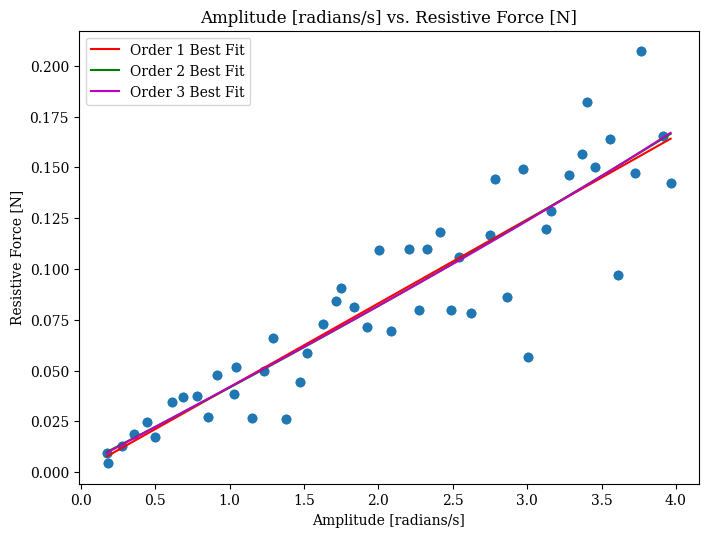

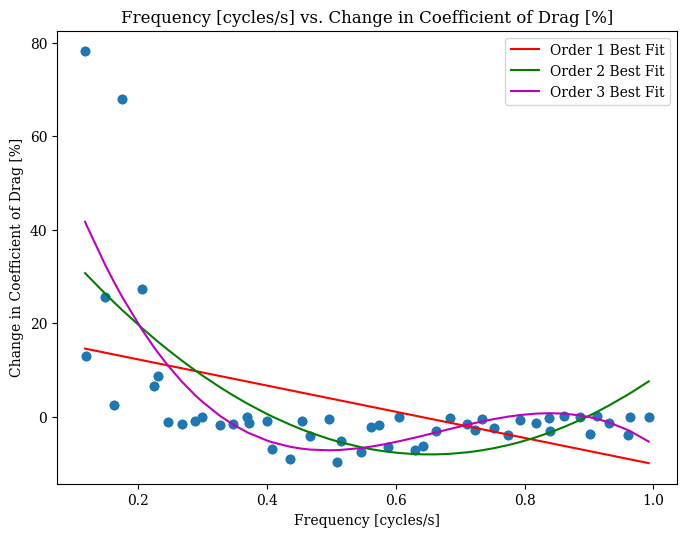

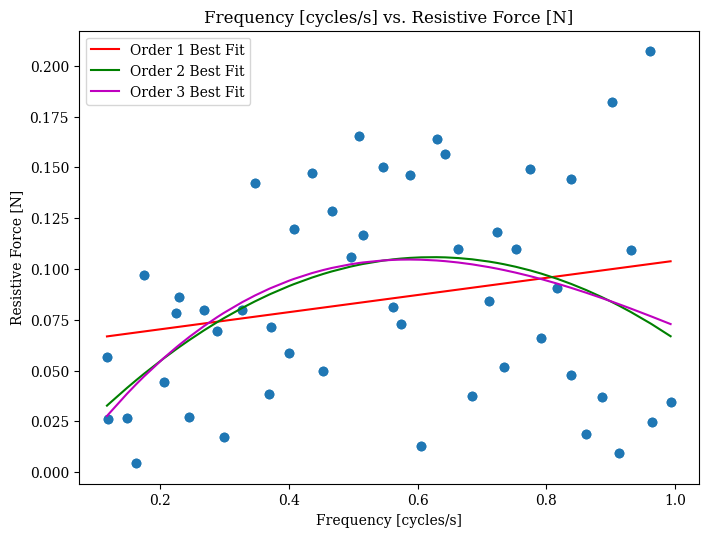

In [57]:
from IPython.display import Image, display
for mapPath in mapPaths:
    display(Image(filename=mapPath))

# Post-Process Optimization Study

### Optimization Algorithm Convergence

In [58]:
hist = optStudy.algorithm.history
n_evals = np.array([e.evaluator.n_eval for e in hist])
print('Number of Evaluations:', n_evals)

Number of Evaluations: [ 50  66  82  98 114 130 146 162 178 194 210 226 242]


In [59]:
opt_avg = []
for h in hist:
    F_opt = np.array([o.F for o in h.opt])
    F_avg = np.mean(F_opt, axis=0)
    print(F_avg)
    opt_avg.append(F_avg)
opt_avg = np.array(opt_avg)

[-2.7604193  0.0762726]
[-2.5934424   0.07053686]
[-2.49649353  0.06615902]
[-4.62825601  0.08332938]
[-4.33427923  0.07981235]
[-6.65508522  0.11428048]
[-6.49474946  0.11039998]
[-6.17532844  0.10342721]
[-5.36493769  0.08837831]
[-5.45038712  0.09105766]
[-5.23249063  0.08601674]
[-5.00366692  0.08239458]
[-5.54525473  0.09261889]


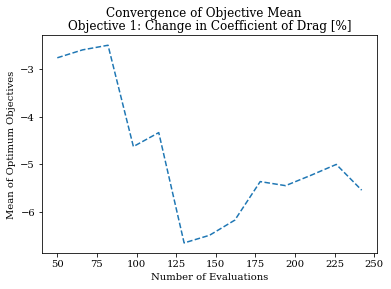

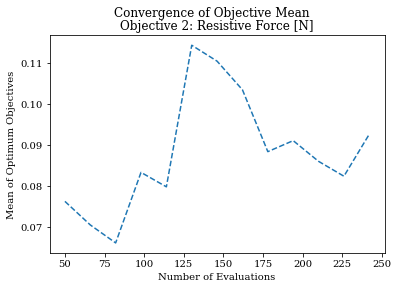

In [60]:
for obj_i in range(optStudy.BaseCase.n_obj):
#     print(opt_sum)
    opt_obj = opt_avg[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Objective Mean')
    plt.title(f'Objective {obj_i+1}: {obj_labels[obj_i]}')
    plt.plot(n_evals, opt_obj, "--")
    plt.xlabel('Number of Evaluations')
    plt.ylabel('Mean of Optimum Objectives')
#     plt.yscale("log")
    plt.savefig(os.path.join(optStudy.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

In [61]:
opt_minL = 1000
for h in hist:
    l = len(h.opt)
    if l < opt_minL:
        opt_minL = l
print('Optimum minimum length:', opt_minL)
opt_sum = []
for h in hist:
    F_opt = np.array([o.F for o in h.opt[:opt_minL]])
    F_sum = np.sum(F_opt, axis=0)
#     print(F_sum)
    opt_sum.append(F_sum)
opt_sum = np.array(opt_sum)

Optimum minimum length: 10


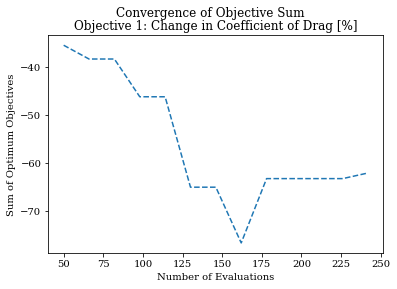

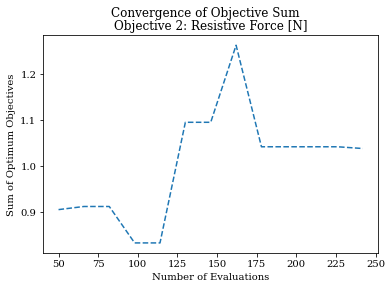

In [62]:
for obj_i in range(optStudy.BaseCase.n_obj):
#     print(opt_sum)
    opt_obj = opt_sum[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Objective Sum')
    plt.title(f'Objective {obj_i+1}: {obj_labels[obj_i]}')
    plt.plot(n_evals, opt_obj, "--")
    plt.xlabel('Number of Evaluations')
    plt.ylabel('Sum of Optimum Objectives')
#     plt.yscale("log")
    plt.savefig(os.path.join(optStudy.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

In [63]:
hist = optStudy.algorithm.history
opt = np.array([e.opt[0].F for e in hist])

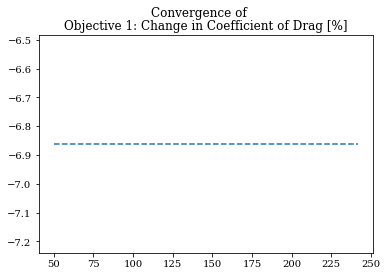

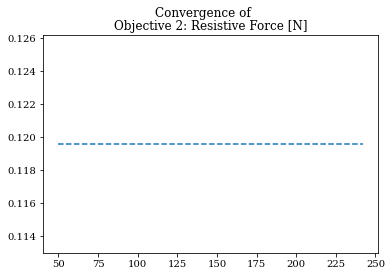

In [64]:
for obj_i in range(len(opt[0])):
    opt_obj = opt[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of ')
    plt.title(f'Objective {obj_i+1}: {obj_labels[obj_i]}')
    plt.plot(n_evals, opt_obj, "--")
#     plt.yscale("log")
    plt.savefig(os.path.join(optStudy.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

### Performance Indicator - Hypervolume
https://pymoo.org/misc/performance_indicator.html#Hypervolume

Maximize hypervolume from reference point. 

In [65]:
all_obj = [alg.pop.get('F') for alg in hist]

In [66]:
mean_all_obj = []
for obj_i in range(optStudy.BaseCase.n_obj):
    mean_all_obj.append(np.mean([np.mean(obj_g[:,obj_i]) for obj_g in all_obj]))
print(mean_all_obj)

[-3.7034453851433775, 0.09061519353850521]


In [67]:
mean_g1_obj = []
popF = hist[-1].pop.get('F')
for obj_i in range(optStudy.BaseCase.n_obj):
    mean_g1_obj.append(np.mean(popF[:,obj_i]))
print(mean_g1_obj)

[-5.03646677802522, 0.08459784247071887]


In [68]:
ref_pt = [4, 4]
ref_pt = mean_g1_obj
ref_pt = mean_all_obj
sf = 1
ref_pt = [mean_obj*sf for mean_obj in mean_g1_obj]

In [69]:
from pymoo.factory import get_performance_indicator
hv = get_performance_indicator("hv", ref_point=np.array(ref_pt))

In [70]:
for gen, alg in enumerate(hist):
    print('Generation', gen+1, f"hypervolume {hv.do(alg.pop.get('X'))}")

Generation 1 hypervolume 0.0
Generation 2 hypervolume 0.0
Generation 3 hypervolume 0.0
Generation 4 hypervolume 0.0
Generation 5 hypervolume 0.0
Generation 6 hypervolume 0.0
Generation 7 hypervolume 0.0
Generation 8 hypervolume 0.0
Generation 9 hypervolume 0.0
Generation 10 hypervolume 0.0
Generation 11 hypervolume 0.0
Generation 12 hypervolume 0.0
Generation 13 hypervolume 0.0


### Latest Generation 

In [71]:
max_disp_len = 10

In [72]:
if len(optStudy.algorithm.pop.get('X')) < max_disp_len:
    print('FINAL POPULATION')
    print('Parameters')
    print(optStudy.algorithm.pop.get('X'))
    print('Objectives')
    print(optStudy.algorithm.pop.get('F'))

In [135]:
latest_pop = optStudy.algorithm.history[-1].pop
latest_popX = latest_pop.get('X')
latest_popF = latest_pop.get('F')

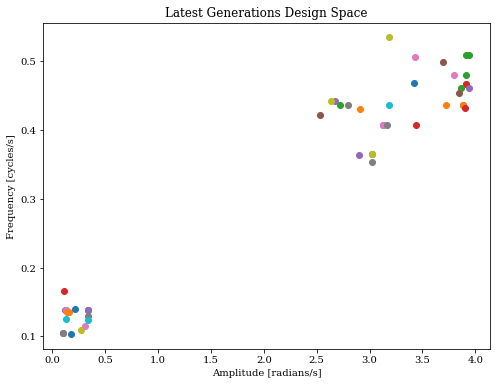

In [136]:
plot = Scatter(title='Latest Generations Design Space', legend=False, labels=optStudy.BaseCase.var_labels)
for ind_i, ind in enumerate(latest_popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(os.path.join(optStudy.plotDir, 'latest_var_space.png'))
plot.show()

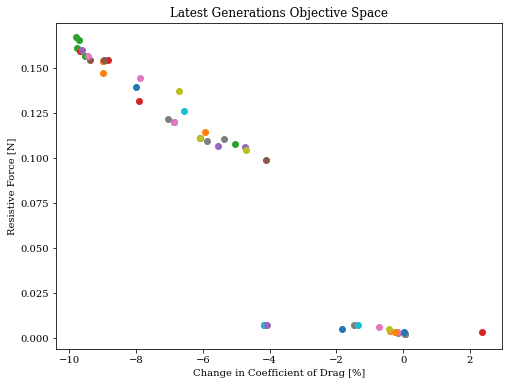

In [137]:
plot = Scatter(title='Latest Generations Objective Space', 
               legend=False, 
               labels=optStudy.BaseCase.obj_labels,
               s=60,
               alpha=0.9
              )
for ind_i, ind in enumerate(latest_popF):
    plot.add(ind, label=f'IND {ind_i+1}')
# save objective space plot
plot.save(os.path.join(optStudy.plotDir, 'latest_obj_space.png'))
plot.show()

### Optimum

In [129]:
assert optStudy.algorithm.opt is not None
print(len(optStudy.algorithm.opt))

32


In [130]:
n_opt_disp = 15

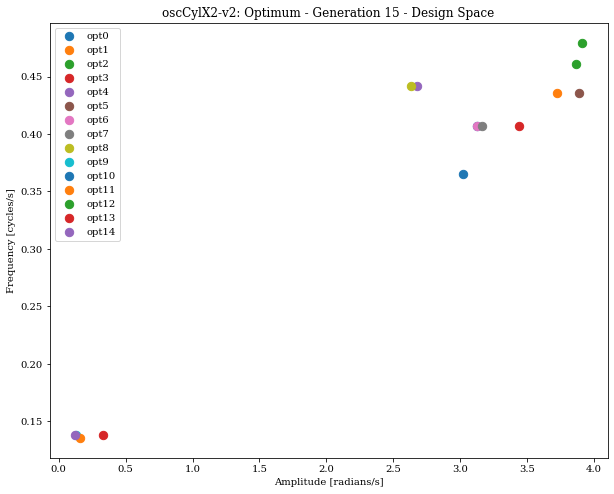

In [131]:
opt_pop = optStudy.algorithm.opt[:n_opt_disp]
gen = optStudy.algorithm.n_gen
varPlot = Scatter(title=f'{optStudy.optName}: Optimum - Generation {gen} - Design Space', 
                  figsize=(10,8),
                  labels=optStudy.BaseCase.var_labels,
                  legend=True
                 )
for opt_i, opt in enumerate(opt_pop):
    varPlot.add(opt.get('X'), label=f'opt{opt_i}', s=70)
varPlot.save(os.path.join(optStudy.plotDir, f'optimum-gen{gen}-varSpace.png'))
varPlot.show()

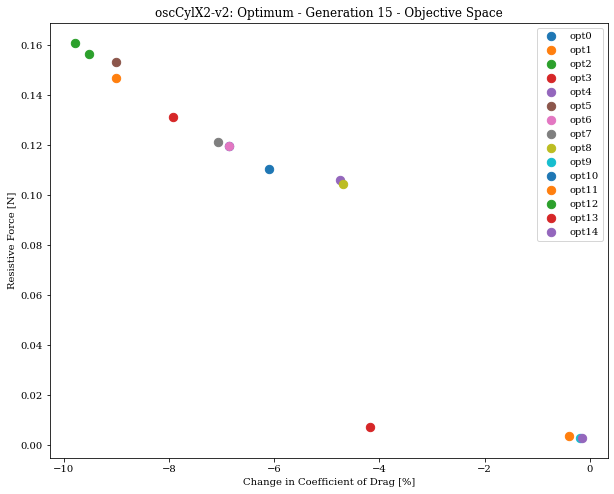

In [132]:
opt_pop = optStudy.algorithm.opt[:n_opt_disp]
gen = optStudy.algorithm.n_gen
plot = Scatter(title=f'{optStudy.optName}: Optimum - Generation {gen} - Objective Space', 
                  figsize=(10,8),
                  labels=optStudy.BaseCase.obj_labels,
                  legend=True
                 )
for opt_i, opt in enumerate(opt_pop):
    plot.add(opt.get('F'), label=f'opt{opt_i}', s=70)
plot.save(os.path.join(optStudy.plotDir, f'optimum-gen{gen}-objSpace.png'))
plot.show()

### Print Every Generation

In [80]:
if optStudy.algorithm.n_gen < 10 and len(algorithm.pop.get('X')) < 10:
    print('EVERY GENERATION')
    for gen in range(algorithm.n_gen):
        print(f'generation {gen}')
        var_g = algorithm.callback.data['var'][gen]
        obj_g = algorithm.callback.data['obj'][gen]
        for ind in range(len(var_g)):
            var_i = var_g[ind]
            obj_i = obj_g[ind]
            print(f'ind{ind}: ', end='')
            for n in range(len(var_i)):
                print(f'{var_labels[n]}: {var_i[n]}', end=' ')
            print(' // ', end='')
            for n in range(len(obj_i)):
                print(obj_labels[n] + ':' + '%.3f' % obj_i[n], end=' ')
            print()

### All Design Points

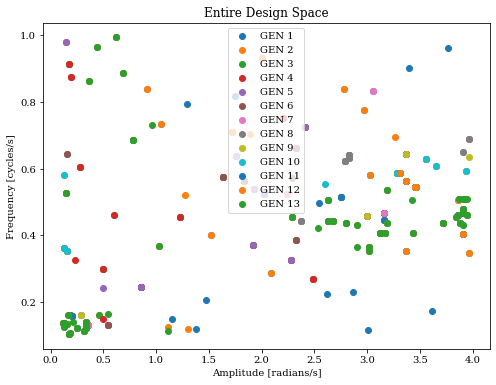

In [81]:
if optStudy.BaseCase.n_var > 3: # plot without labels
    print('CAN NOT REPRESENT DESIGN SPACE IN 3D. USING ')
    plot = Scatter()
    plot.add(algorithm.pop.get('X')[:10])

# All design points
else: 
    if optStudy.algorithm.n_gen < 15:
        leg = True
    else:
        leg = False
    plot = Scatter(title='Entire Design Space', legend=leg, labels=var_labels)
    for g, alg in enumerate(hist):
        plot.add(alg.pop.get('X'), label=f'GEN {g+1}')

# save plot to png file
plot.save(os.path.join(optStudy.plotDir, 'entire_design_space.png'))
plot.show()

### All Objective Points

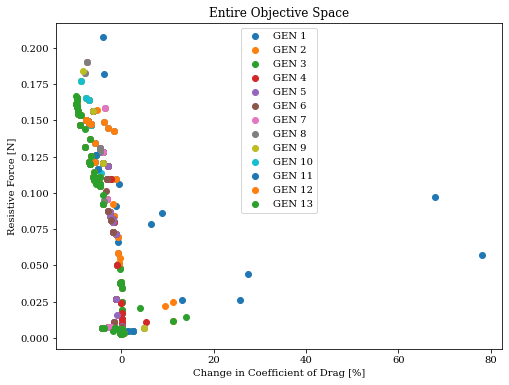

In [82]:
if optStudy.algorithm.n_gen < 15:
    leg = True
else:
    leg = False
plot = Scatter(title='Entire Objective Space', legend=leg, labels=obj_labels)
for g, alg in enumerate(hist):  # range(algorithm.n_gen)
    plot.add(alg.pop.get('F'), label=f'GEN {g+1}')
# if pf is not None:
#     plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.save(os.path.join(optStudy.plotDir, 'entire_obj_space.png'))
plot.show()

### Last 10 Generation of Parameter Space

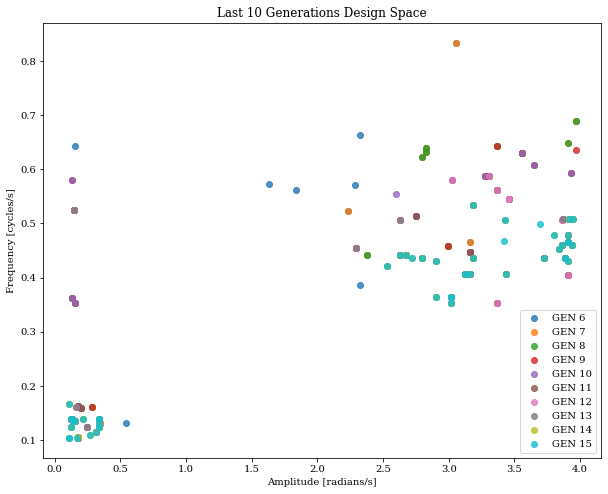

In [128]:
# Last 10 generations
# last 10 gens. design points
hist = optStudy.algorithm.history
if optStudy.algorithm.n_gen > 10:
    #### Design Space ####
    if optStudy.BaseCase.n_var > 3: # plot without labels
        print('CAN NOT REPRESENT OBJECTIVE SPACE IN 3D. Using Pairwise Scatter Plots')
        plot = Scatter(figsize=(10, 8))
        plot.add(algorithm.pop.get('X')[:10])
    # Last 10 generations of objective points
    else: 
        plot = Scatter(title='Last 10 Generations Design Space', legend=True, 
                       figsize=(10, 8),
                       labels=optStudy.BaseCase.var_labels
                      )
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('X'), label=f'GEN {g+1}',
                     alpha=0.8
                    )
    # save design space plot
    plot.save(os.path.join(optStudy.plotDir, 'final_10_design_space.png'))
    plot.show()

### Last 10 Generation of Objective Space

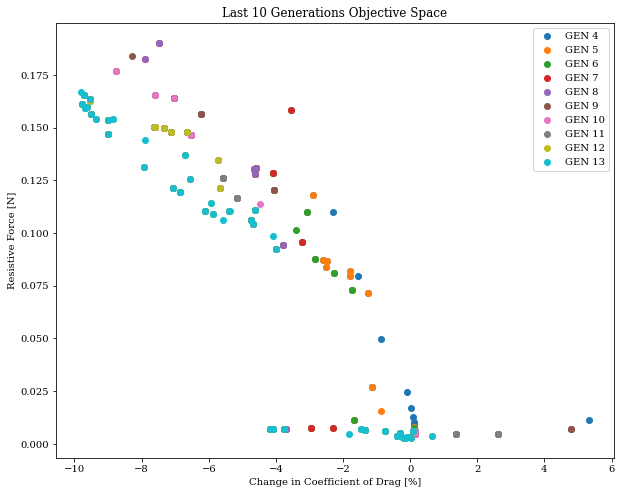

In [84]:
### Objective Space ####
if optStudy.algorithm.n_gen > 10:
    if optStudy.BaseCase.n_obj >3:
        plot = Scatter()
        plot.add(optStudy.algorithm.pop.get('F')[:10])
    else:
        # last 10 gens. objective points
        plot = Scatter(title='Last 10 Generations Objective Space', 
                       legend=True, 
                       labels=optStudy.BaseCase.obj_labels,
                       figsize=(10,8)
                      )
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('F'), label=f'GEN {g+1}')

    # save objective space plot
    plot.save(os.path.join(optStudy.plotDir, 'final_10_obj_space.png'), dpi=100)
    plot.show()

### Extract Data 

In [85]:
checkpoint = optStudy.algorithm

In [86]:
# is the full history of the algorithm saved? 
print('Checkpoint Objective Population:\n', checkpoint.pop.get('F')[:5])
if np.all(checkpoint.pop.get('F')) is not None: 
    algorithm = checkpoint
    print('Checkpoint @ end of generation')
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')
else:
    print('Checkpoint mid-generation')
    print('     "algorithm" variable represents last completed generation')
    print('     "algorithm.callback" unusable with history objects')
    algorithm = checkpoint.history[-1]
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')

Checkpoint Objective Population:
 [[-6.86208143e+00  1.19578985e-01]
 [-8.99451773e+00  1.47054577e-01]
 [-9.51966436e+00  1.56463641e-01]
 [-4.16971857e+00  7.03286022e-03]
 [-4.75286572e+00  1.06019302e-01]]
Checkpoint @ end of generation
     Generation - 13, 14


2022-03-15 15:00:55,767 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: ------------------------------
2022-03-15 15:00:55,767 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: ------------------------------
2022-03-15 15:00:55,770 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: LOGGER INITIALIZED
2022-03-15 15:00:55,770 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: LOGGER INITIALIZED
2022-03-15 15:00:55,772 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: NEW CASE - directory did not exist
2022-03-15 15:00:55,772 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: NEW CASE - directory did not exist
2022-03-15 15:00:56,043 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: COPIED FROM: base_cases/osc-cyl_base
2022-03-15 15:00:56,043 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: COPIED FROM: base_cases/osc-cyl_base
2022-03-15 15:00:56,050 :: INFO     :: pymooCFD.core

2022-03-15 15:01:06,376 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: COMPLETE: PRE-PROCESS
2022-03-15 15:01:06,379 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: SOLVING AS SUBPROCESS...
2022-03-15 15:01:06,379 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: SOLVING AS SUBPROCESS...
2022-03-15 15:01:06,381 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: 	command: ['mpirun', '-n', '10', '2D_cylinder']
2022-03-15 15:01:06,381 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: 	command: ['mpirun', '-n', '10', '2D_cylinder']
2D_cylinder: error while loading shared libraries: libscotch.so: cannot open shared object file: No such file or directory
2D_cylinder: error while loading shared libraries: libscotch.so: cannot open shared object file: No such file or directory
2D_cylinder: error while loading shared libraries: libscotch.so: cannot open shared object file: No such file or directory
2D_cylinder: error whil

2022-03-15 15:01:14,109 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: Solve Time: 2 secs
2022-03-15 15:01:14,109 :: INFO     :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: Solve Time: 2 secs
2022-03-15 15:01:14,114 :: WARNING  :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: MAX NUMBER OF RE-RUNS (3) REACHED
2022-03-15 15:01:14,114 :: WARNING  :: pymooCFD.core.cfdCase.validation_case-2.0-0.4 :: MAX NUMBER OF RE-RUNS (3) REACHED


OSError: validation_case-2.0-0.4/FORCES_temporal.txt not found.